In [3]:
%load_ext autoreload
%autoreload 2

from simulation_loader import JsonLoader, SimulationLoader
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [4]:
processedSims:pd.DataFrame
dataPath:str = '../Data/firstSimulationResults.json'
json_loader = JsonLoader(file_path=dataPath)    

# with json_loader as loader:
sim = json_loader.retrieve_simulations()

Loading simulations from JSON:   0%|          | 0/18000 [00:00<?, ?lines/s]

In [15]:
#baseConfig, DEIB SERVER
# filteredSims = SimulationLoader.withTags(sim, ['DEIB SERVER', 'curve'])
processedSims = sim.copy()
SimulationLoader.addAggregation(processedSims, 'out.xtes')
SimulationLoader.addAggregation(processedSims, 'out.xtes', 'max')
SimulationLoader.addAggregation(processedSims, 'out.xtes', 'median')
SimulationLoader.addAggregation(processedSims, 'in.angles.2', 'element')
SimulationLoader.addFps(processedSims)
processedSims.head()

,in.map_size,in.initial_position,in.maxSpeed,in.minSpeed,in.maxTime,in.maxXTE,in.segLength,in.angles,out.elapsedTime,out.iterations,...,out.speeds,out.xtes,out.steerings,out.throttles,out.road,out.xtes.avg,out.xtes.max,out.xtes.median,in.angles.element,fps
0,250,"[125.0, 0.0, -28.0, 8.0]",101,10,30,3.0,25,"[0, 0, -84, 0, 0]",9.245876,184,...,"[0.0, 0.0, 0.0, 0.6591600000000001, 1.84428, 2...","[-0.0003, -0.0003, -0.0003, -0.0003, -0.0004, ...","[{'__numpy__': 'bNtpug==', 'dtype': '<f4', 'sh...","[{'__numpy__': '8/9/Pw==', 'dtype': '<f4', 'sh...","[[125.0, 0.0, 1.9, 8.0], [125.13485930893718, ...",0.672631,2.4867,0.3612,84,19.900764
1,250,"[125.0, 0.0, -28.0, 8.0]",101,43,30,3.0,25,"[0, 0, -35, 0, 0]",8.685331,175,...,"[0.0, 0.0, 0.0, 1.1386800000000001, 1.92888000...","[0.0, 0.0, 0.0, 0.0, 0.0, -0.0001, -0.0001, -0...","[{'__numpy__': 'RfMPvA==', 'dtype': '<f4', 'sh...","[{'__numpy__': '8fp/Pw==', 'dtype': '<f4', 'sh...","[[125.0, 0.0, 1.9, 8.0], [125.13485930893718, ...",0.580430,2.8158,0.1836,35,20.148915
2,250,"[125.0, 0.0, -28.0, 8.0]",101,36,30,3.0,25,"[0, 0, -8, 0, 0]",8.396113,167,...,"[0.0, 0.0, 0.0, 1.0141200000000001, 1.73196000...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0001, -...","[{'__numpy__': 'TK8IvA==', 'dtype': '<f4', 'sh...","[{'__numpy__': 'cPt/Pw==', 'dtype': '<f4', 'sh...","[[125.0, 0.0, 1.9, 8.0], [125.13485930893718, ...",0.165212,0.9730,0.0443,8,19.890157
3,250,"[125.0, 0.0, -28.0, 8.0]",101,0,30,3.0,25,"[0, 0, -1, 0, 0]",8.333943,168,...,"[0.0, 0.0, 0.0, 1.01556, 1.85508, 2.9232000000...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0001, -...","[{'__numpy__': 'Fo4QvA==', 'dtype': '<f4', 'sh...","[{'__numpy__': '5vp/Pw==', 'dtype': '<f4', 'sh...","[[125.0, 0.0, 1.9, 8.0], [125.13485930893718, ...",0.086215,0.4754,0.0463,1,20.158525
4,250,"[125.0, 0.0, -28.0, 8.0]",101,14,30,3.0,25,"[0, 0, -26, 0, 0]",8.694381,175,...,"[0.0, 0.0, 0.0, 0.73548, 1.7956800000000002, 2...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0001, -...","[{'__numpy__': 'V38qvA==', 'dtype': '<f4', 'sh...","[{'__numpy__': '5/h/Pw==', 'dtype': '<f4', 'sh...","[[125.0, 0.0, 1.9, 8.0], [125.13485930893718, ...",0.549870,2.9365,0.1410,26,20.127944


In [17]:
sim.columns

Index(['in.map_size', 'in.initial_position', 'in.maxSpeed', 'in.minSpeed',
       'in.maxTime', 'in.maxXTE', 'in.segLength', 'in.angles',
       'out.elapsedTime', 'out.iterations', 'out.positions', 'out.speeds',
       'out.xtes', 'out.steerings', 'out.throttles', 'out.road'],
      dtype='object')

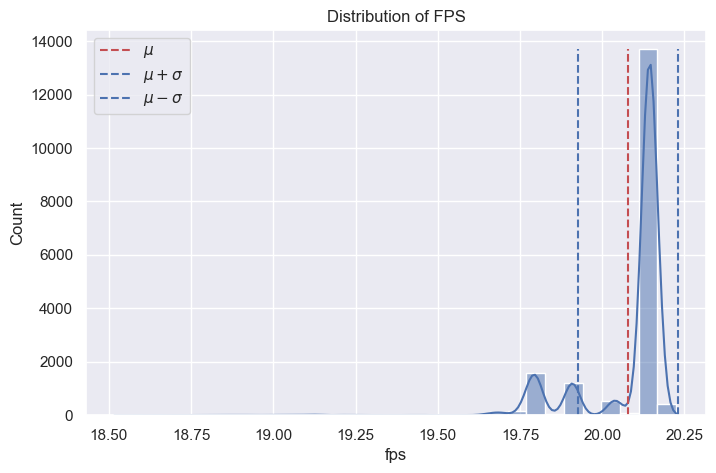

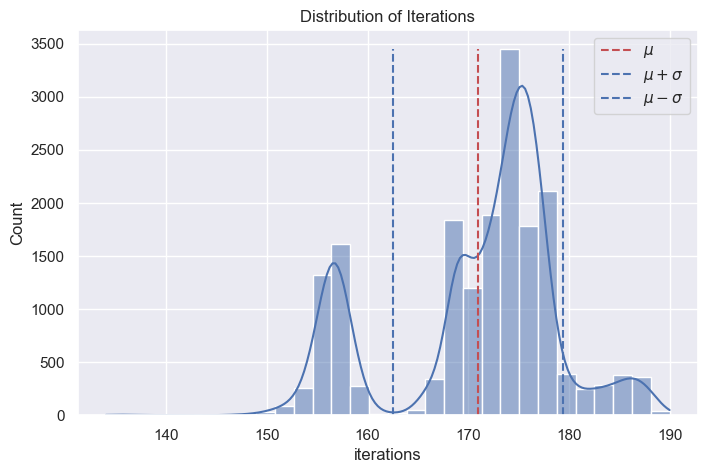

In [21]:
from simulation_analysis.Plotter import plotDistribution

plotDistribution(processedSims['fps'], 'Distribution of FPS', 'fps', 'Count')
plotDistribution(processedSims['out.iterations'], 'Distribution of Iterations', 'iterations', 'Count')

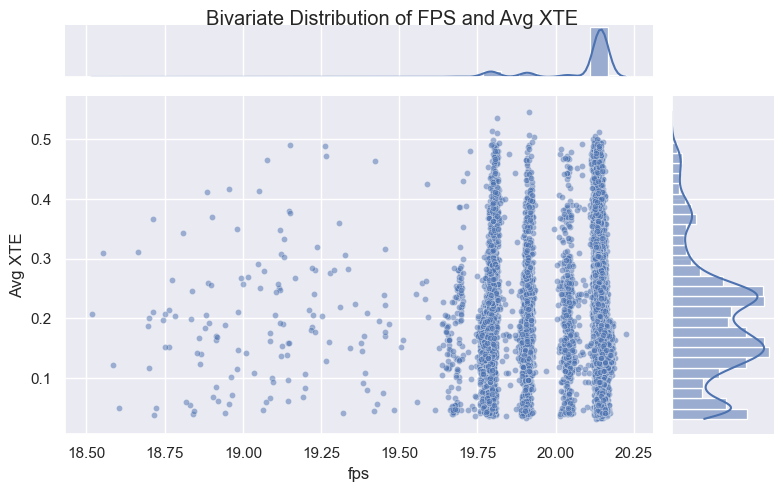

In [16]:
from simulation_analysis.Plotter import plotBivariateDistribution

plotBivariateDistribution(processedSims['fps'], processedSims['out.xtes.median'], 'Bivariate Distribution of FPS and Avg XTE', 'fps', 'Avg XTE')

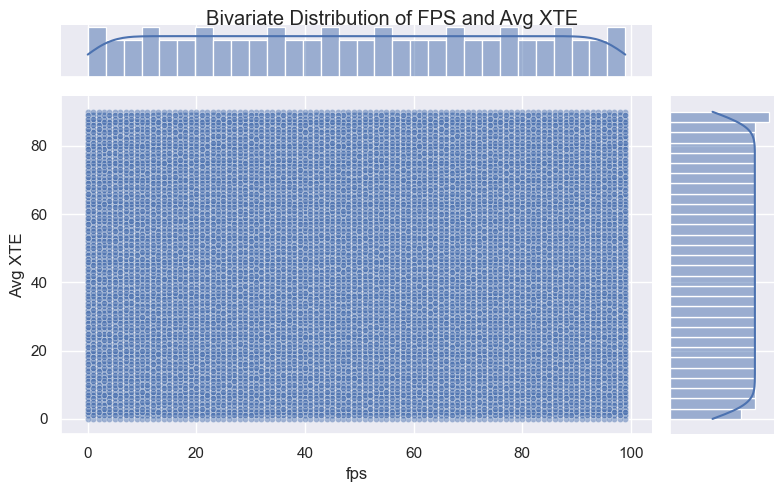

In [8]:
plotBivariateDistribution(processedSims['in.minSpeed'], processedSims['in.angles.element'], 'Bivariate Distribution of FPS and Avg XTE', 'fps', 'Avg XTE')

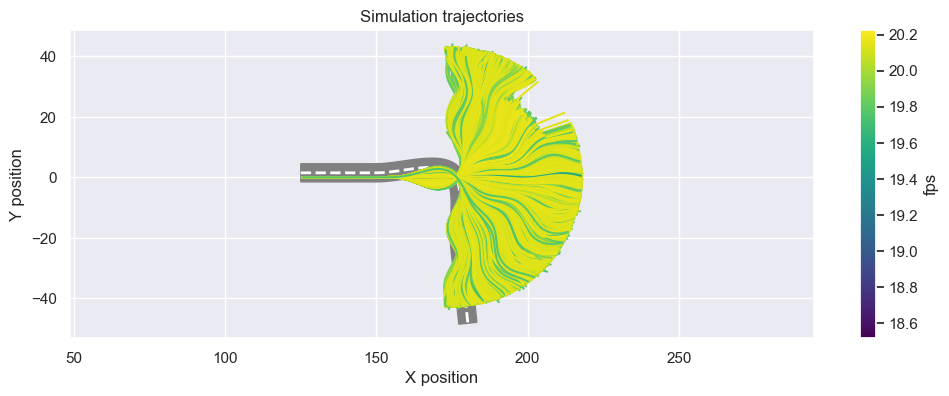

In [9]:
from simulation_analysis.Plotter import plotTrajectoriesOfARoad

plotTrajectoriesOfARoad(
    roadControlPoints=processedSims.iloc[0]['out.road'],
    trajectories=processedSims['out.positions'].tolist(),
    trajectoriesColor=processedSims['fps'].tolist(),
    trajectoriesColorName='fps'
)
plt.show()

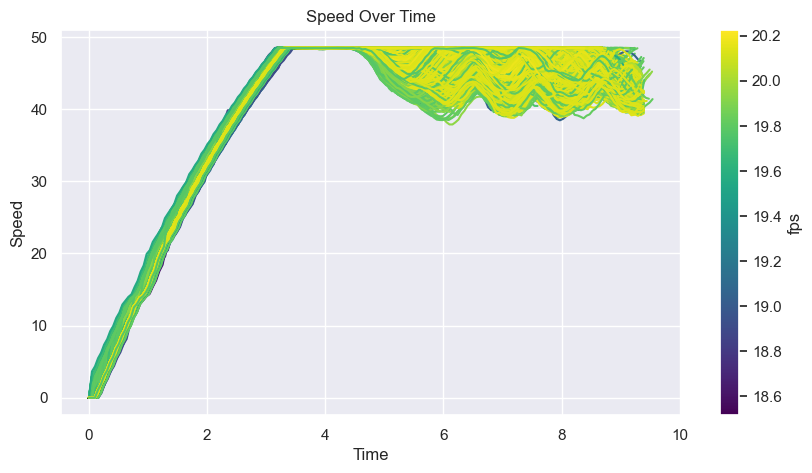

In [10]:
from simulation_analysis.Plotter import plotTimeSeries

plotTimeSeries(
    processedSims['out.speeds'].tolist(),
    elapsedTimes=processedSims['out.elapsedTime'].tolist(),
    title="Speed Over Time",
    ylabel="Speed",
    legend=False,
    color=processedSims['fps'].tolist(),
    colorName='fps'
)

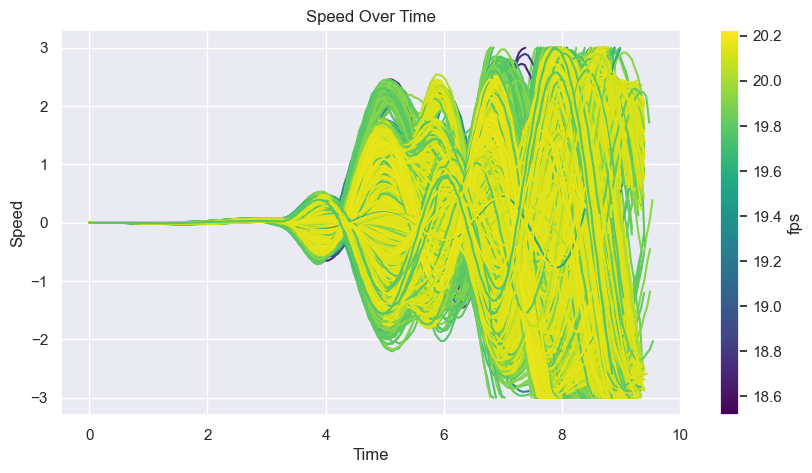

In [11]:
plotTimeSeries(
    processedSims['out.xtes'].tolist(),
    elapsedTimes=processedSims['out.elapsedTime'].tolist(),
    title="Speed Over Time",
    ylabel="Speed",
    legend=False,
    color=processedSims['fps'].tolist(),
    colorName='fps'
)

<Axes: xlabel='in.minSpeed'>

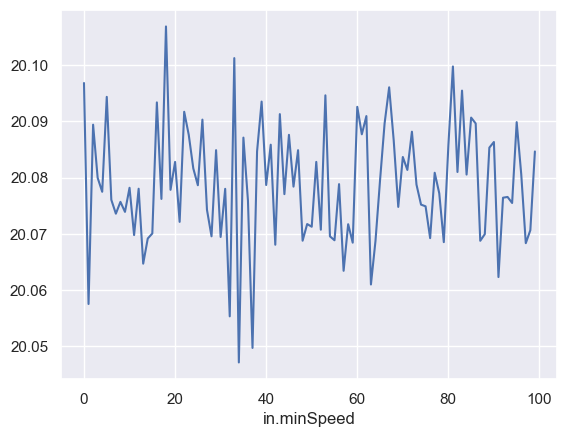

In [35]:
# processedSims['in.minSpeed', 'fps'].groupby('in.minSpeed').mean()['fps'].plot(kind='bar')
processedSims[['in.minSpeed', 'fps']].groupby('in.minSpeed').mean()['fps'].plot()